In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()
# set_chinese_font()

# Data Input

In [2]:
data = []
for year in range(2010,2018):
    file = "./movie_%s.json" % year
    with open(file, encoding='utf-8' ) as data_file:    
        data += json.load(data_file)

# file = "./movie.json"
# with open(file, encoding='utf-8' ) as data_file:    
#     data = json.load(data_file)

In [3]:
df = pd.DataFrame(data)
df.describe()

,1_star,2_star,3_star,4_star,5_star,imdb_id,img_url,rating,ratings_num,title,url,year
count,2118,2118,2118,2118,2118,2118,2118,2118,2118,2118,2118,2118
unique,700,403,575,493,344,1470,2102,71,1907,2101,2102,22
top,0.4%,25.9%,0.0%,0.0%,3.2%,,https://img3.doubanio.com/view/movie_poster_co...,5.0,101,我的诗篇,https://movie.douban.com/subject/26263844/,2015
freq,38,15,14,55,37,638,2,56,4,2,2,343


In [4]:
df.drop_duplicates('title', inplace=True)
df.describe()

,1_star,2_star,3_star,4_star,5_star,imdb_id,img_url,rating,ratings_num,title,url,year
count,2101,2101,2101,2101,2101,2101,2101,2101,2101,2101,2101,2101
unique,700,403,575,493,343,1469,2101,71,1904,2101,2101,21
top,0.4%,25.9%,0.0%,0.0%,3.2%,,https://img1.doubanio.com/view/movie_poster_co...,5.0,160,大变局之梦回甲午,https://movie.douban.com/subject/21319320/,2015
freq,38,14,14,55,37,633,1,56,4,1,1,340


In [5]:
df['rating'] = df['rating'].astype(float)
df['ratings_num'] = df['ratings_num'].astype(int)
df['1_star'] = df['1_star'].apply(lambda x: float(x.strip('%'))/100)
df['2_star'] = df['2_star'].apply(lambda x: float(x.strip('%'))/100)
df['3_star'] = df['3_star'].apply(lambda x: float(x.strip('%'))/100)
df['4_star'] = df['4_star'].apply(lambda x: float(x.strip('%'))/100)
df['5_star'] = df['5_star'].apply(lambda x: float(x.strip('%'))/100)

df.rename(columns={'title': 'name', 'rating': 'db_rating', 'ratings_num': 'db_ratings_count',   
                   'url': 'douban_url', 'img_url':'image_url', 'imdb_id': 'movie_tt_id'}, inplace=True)

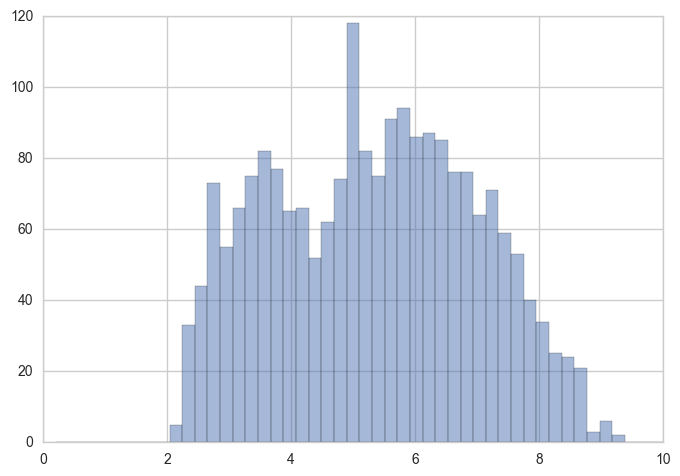

In [6]:
bins=linspace(0,10)
df['db_rating'].hist(bins=bins, alpha=0.5, label = 'douban')

In [7]:
df['year'].value_counts()

2015    340
2014    334
2016    320
2012    296
2013    287
2011    231
2010    195
2009     48
2017     17
2008     13
2007      6
2006      3
2005      2
1995      2
1998      1
1997      1
1992      1
1984      1
1993      1
1996      1
2004      1
Name: year, dtype: int64

# Clean Data set

In [8]:
df = df.query("db_ratings_count > 5000")
df.describe()

,1_star,2_star,3_star,4_star,5_star,db_rating,db_ratings_count
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,0.099862,0.158710,0.368981,0.256646,0.115802,6.258935,69944.161597
std,0.150228,0.112707,0.133385,0.148913,0.114443,1.335444,85584.335938
min,0.001000,0.003000,0.012000,0.004000,0.008000,2.300000,5005.000000
25%,0.011000,0.053000,0.269000,0.128000,0.040000,5.400000,13643.000000
50%,0.033000,0.143000,0.390000,0.241000,0.071000,6.300000,37483.500000
75%,0.109250,0.252000,0.477000,0.394250,0.150000,7.300000,92063.250000
max,0.942000,0.422000,0.619000,0.569000,0.676000,9.200000,709045.000000


In [9]:
df['year'].value_counts()

2014    158
2015    150
2012    149
2013    138
2016    138
2011    137
2010    124
2009     28
2017      9
2008      6
2007      3
2006      3
1995      2
1984      1
1997      1
1996      1
1992      1
1998      1
1993      1
2004      1
Name: year, dtype: int64

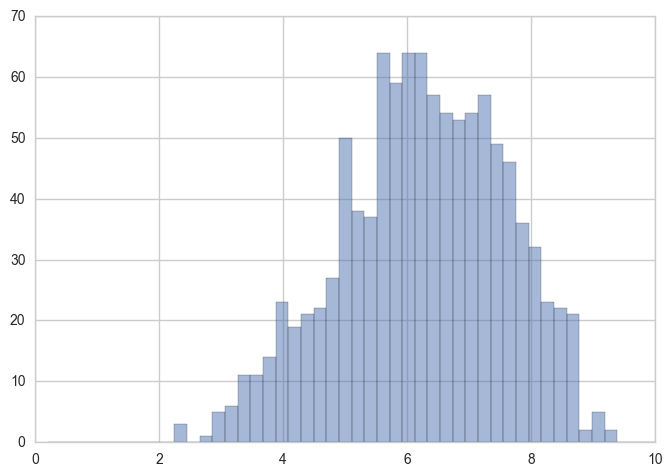

In [10]:
bins=linspace(0,10)
df['db_rating'].hist(bins=bins, alpha=0.5, label = 'douban')

In [11]:
df['std']=(df['1_star']*(2-df['db_rating'])**2+df['2_star']*(4-df['db_rating'])**2+df['3_star']*(6-df['db_rating'])**2+ \
df['4_star']*(8-df['db_rating'])**2+df['5_star']*(10-df['db_rating'])**2)**0.5

In [12]:
df.sort_values(by='std',ascending=False)[:20]

,1_star,2_star,3_star,4_star,5_star,movie_tt_id,image_url,db_rating,db_ratings_count,name,douban_url,year,std
956,0.517,0.067,0.050,0.150,0.217,tt2187209,https://img3.doubanio.com/view/movie_poster_co...,5.0,8864,咏春小龙,https://movie.douban.com/subject/22964524/,2013,3.397793
1034,0.631,0.058,0.080,0.124,0.107,,https://img5.doubanio.com/view/movie_poster_co...,4.0,15989,我想结婚的时候你在哪,https://movie.douban.com/subject/25732548/,2014,2.946184
1097,0.234,0.087,0.231,0.222,0.227,tt3671922,https://img3.doubanio.com/view/movie_poster_co...,6.2,5645,我就是我,https://movie.douban.com/subject/25899479/,2014,2.924934
742,0.258,0.156,0.299,0.088,0.199,tt2876446,https://img3.doubanio.com/view/movie_poster_co...,5.6,7656,洛克王国2：圣龙的心愿,https://movie.douban.com/subject/20443571/,2013,2.854891
1093,0.437,0.172,0.176,0.107,0.107,,https://img3.doubanio.com/view/movie_poster_co...,4.6,15057,赛尔号大电影4：圣魔之战,https://movie.douban.com/subject/25845586/,2014,2.778136
977,0.502,0.152,0.152,0.100,0.095,tt3296588,https://img3.doubanio.com/view/movie_poster_co...,4.3,5677,唇唇欲动,https://movie.douban.com/subject/20398974/,2013,2.750289
1304,0.571,0.152,0.129,0.037,0.111,,https://img5.doubanio.com/view/movie_poster_co...,3.9,7194,拆散专家,https://movie.douban.com/subject/25868330/,2014,2.717352
1989,0.317,0.222,0.241,0.092,0.129,tt6177592,https://img3.doubanio.com/view/movie_poster_co...,5.0,16818,我的战争,https://movie.douban.com/subject/25945350/,2016,2.714590
860,0.461,0.166,0.152,0.150,0.071,,https://img3.doubanio.com/view/movie_poster_co...,4.4,7041,暴走吧，女人,https://movie.douban.com/subject/10764042/,2012,2.691022
1961,0.350,0.238,0.208,0.088,0.116,tt4171876,https://img5.doubanio.com/view/movie_poster_co...,4.8,40053,夏有乔木 雅望天堂,https://movie.douban.com/subject/25843976/,2016,2.689535


(2, 10)

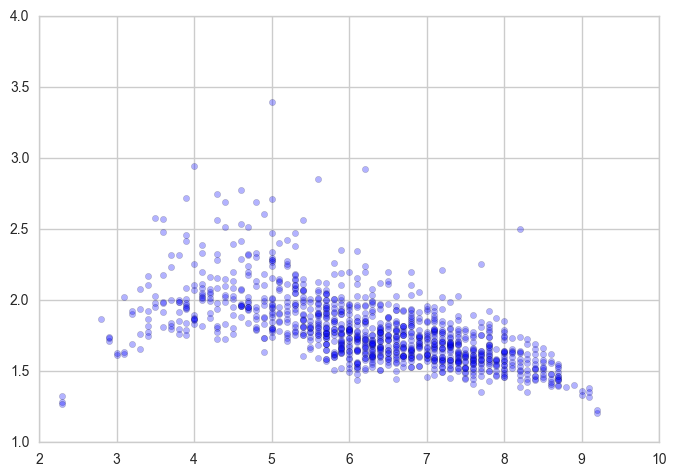

In [13]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3)
ax.set_xlim([2,10])

In [14]:
turn_scatter_into_interactive(fig, scatter_plot, df, 'all.html', show_ratings_num=False)

In [15]:
movie_list(df.sort_values(by='std',ascending=False))

# Popular Moives

In [16]:
df = df.query("db_ratings_count > 20000")
df.describe()

,1_star,2_star,3_star,4_star,5_star,db_rating,db_ratings_count,std
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,0.068274,0.131209,0.363110,0.297067,0.140322,6.619733,102996.633531,1.742387
std,0.117759,0.107121,0.130854,0.144871,0.127545,1.258816,91559.835938,0.216536
min,0.001000,0.003000,0.021000,0.004000,0.009000,2.300000,20064.000000,1.206715
25%,0.007000,0.036000,0.262250,0.171250,0.050000,5.800000,39901.750000,1.585985
50%,0.022000,0.098500,0.382000,0.312000,0.096000,6.700000,70849.500000,1.710849
75%,0.070750,0.215750,0.469000,0.428000,0.183500,7.600000,134515.000000,1.865427
max,0.929000,0.394000,0.595000,0.569000,0.676000,9.200000,709045.000000,2.689535


In [17]:
df.sort_values(by='std',ascending=False)[:20]

,1_star,2_star,3_star,4_star,5_star,movie_tt_id,image_url,db_rating,db_ratings_count,name,douban_url,year,std
1961,0.350,0.238,0.208,0.088,0.116,tt4171876,https://img5.doubanio.com/view/movie_poster_co...,4.8,40053,夏有乔木 雅望天堂,https://movie.douban.com/subject/25843976/,2016,2.689535
1604,0.388,0.288,0.173,0.059,0.091,tt4892714,https://img1.doubanio.com/view/movie_poster_co...,4.4,37397,怦然星动,https://movie.douban.com/subject/26411409/,2015,2.518380
1226,0.262,0.151,0.336,0.184,0.068,tt3429014,https://img3.doubanio.com/view/movie_poster_co...,5.3,56552,人间·小团圆 香港仔,https://movie.douban.com/subject/24736526/,2014,2.473154
1795,0.299,0.187,0.308,0.139,0.067,tt2034800,https://img3.doubanio.com/view/movie_poster_co...,5.0,185467,长城 The Great Wall,https://movie.douban.com/subject/6982558/,2016,2.472246
1797,0.513,0.181,0.178,0.076,0.052,tt3824950,https://img3.doubanio.com/view/movie_poster_co...,3.9,101657,摆渡人,https://movie.douban.com/subject/25911694/,2016,2.418925
1331,0.342,0.233,0.269,0.093,0.063,tt4814354,https://img1.doubanio.com/view/movie_poster_co...,4.6,81676,小时代4：灵魂尽头,https://movie.douban.com/subject/24847343/,2015,2.415616
1798,0.268,0.164,0.355,0.156,0.058,tt4687848,https://img5.doubanio.com/view/movie_poster_co...,5.1,40509,铁道飞虎,https://movie.douban.com/subject/26389069/,2016,2.401252
1332,0.426,0.268,0.183,0.057,0.066,tt4819470,https://img3.doubanio.com/view/movie_poster_co...,4.1,77740,栀子花开,https://movie.douban.com/subject/26021055/,2015,2.388807
1100,0.136,0.138,0.389,0.216,0.121,tt4542658,https://img3.doubanio.com/view/movie_poster_co...,6.1,70209,爸爸去哪儿,https://movie.douban.com/subject/25785314/,2014,2.349213
1915,0.441,0.260,0.175,0.072,0.051,tt5011290,https://img1.doubanio.com/view/movie_poster_co...,4.1,62154,致青春·原来你还在这里,https://movie.douban.com/subject/26290642/,2016,2.334436


(2, 10)

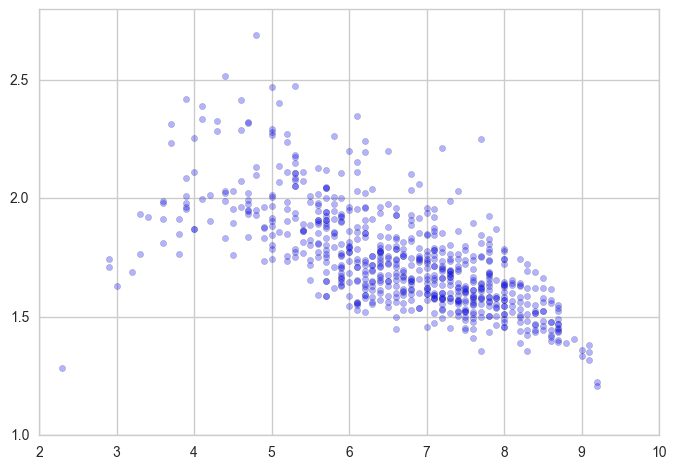

In [18]:
fig, ax = plt.subplots()
scatter_plot = ax.scatter(df.db_rating, df['std'], alpha=0.3)
ax.set_xlim([2,10])

In [19]:
turn_scatter_into_interactive(fig, scatter_plot, df, 'popular.html', show_ratings_num=False)

In [23]:
movie_list(df.sort_values(by='std',ascending=False), len=25)

In [22]:
sub_df = df[df['name'].str.contains("西游")]
movie_list(sub_df.sort_values(by='std',ascending=False))